In [32]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [33]:
# TODO: Change it to your tesseract exe path.
TESSETRACT_PATH = r"D:\Program Files (x86)\Tesseract-OCR\tesseract.exe"
# TODO: Change it to your tesseract exe path.
IMAGES_PATH = [r"D:\Projects\PyCharmProjects\watsonTraining\images_google\popups\warning-you-have-excessive-popups.png",
              r"D:\Projects\PyCharmProjects\watsonTraining\images_google\popups\1.png",
              r"D:\Projects\PyCharmProjects\watsonTraining\images_google\popups\SS3svc32.exe-do-you-want-to-allow-this-app.png",
              r"D:\Projects\PyCharmProjects\watsonTraining\pop2json\popups\Windows-Security-System-fake-alert.png",
              r"D:\Projects\PyCharmProjects\watsonTraining\pop2json\popups\PopupBoxes_Fig1.jpg",
              r"D:\Projects\PyCharmProjects\watsonTraining\pop2json\popups\KIoQc.png",
              r"D:\Projects\PyCharmProjects\watsonTraining\pop2json\popups\images.jpg",
              # r"D:\Projects\PyCharmProjects\watsonTraining\pop2json\popups\images (1).jpg",
              r"D:\Projects\PyCharmProjects\watsonTraining\pop2json\popups\2.JPG",
              r"D:\Projects\PyCharmProjects\watsonTraining\pop2json\popups\3.JPG"]

In [34]:
pytesseract.pytesseract.tesseract_cmd = TESSETRACT_PATH

In [37]:
def main():
    for img_path in IMAGES_PATH:
        # load the example image and convert it to grayscale
        image = cv2.imread(img_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # check to see if we should apply thresholding to preprocess theimage
        # gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
        # write the grayscale image to disk as a temporary file so we can
        # apply OCR to it
        filename = "{}.png".format(os.getpid())
        cv2.imwrite(filename, gray)

        # load the image as a PIL/Pillow image, apply OCR, and then delete
        # the temporary file
        text = pytesseract.image_to_string(Image.open(filename))
        os.remove(filename)
        img = mpimg.imread(img_path)
        imgplot = plt.imshow(img)
        plt.show()
        print(text)

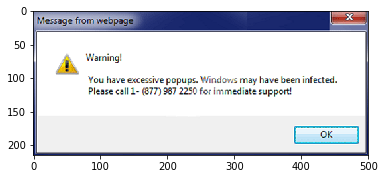

Warning!

You have excessive popups. Windows may have been infected.
Please call 1 (877) 987 2250 for immediate support!


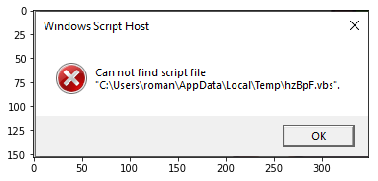

Windows Script Host x

) Can not find script file
“C:\Users\roman\appData\Local\Temp\hzBpF.vbs"


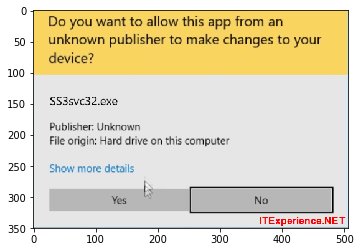

Do you want to allow this app from an
unknown publisher to make changes to your
device?

SS3svc32.exe

Publisher: Unknown
File origin: Hard drive on this computer

Show more details

vom Lid

ITExperience.NET


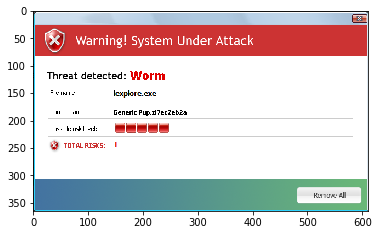

Threat detected: Worm

File name: iexplore.exe

Threat name: Generic PupztTecZeb2a

Possible rsklevet

@ rorarrisks: 2


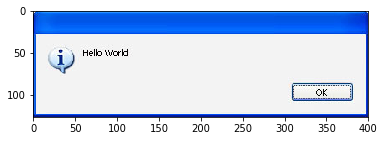

D Hell World


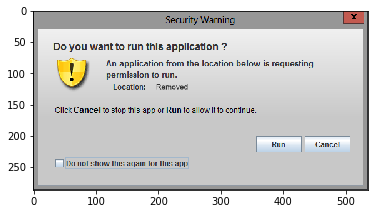

Do you want to run this application ?

! ) ‘An application from the location below is requesting

Click Cancel to stop this app or Run to allow itto continue.

 

 

 

 

 

 

(Do not show this again for this app


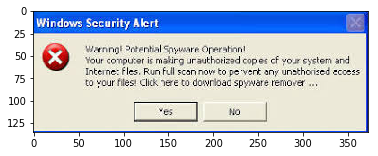

Warning! Potential Spyware Operation!
‘Your computer is making unauthorized copes of your system and
Internet files. Run full scan nav to pervent any unatherised access
to your files! Clk here to download spyware remover ..

bs


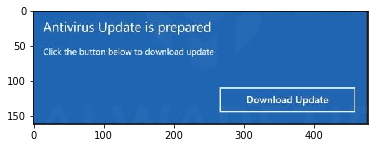

Antivirus Update is prepared

Cee cn Cake eRe cd

 

 

Pee Rt Lied


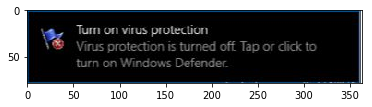

Delage cet
Virus protection is turned off Tap or click to
‘turn on Windows Defender.


In [38]:
main()